# 1. Domača Naloga

## Naloga 1: Linearna regresija

1.a: Dopolni funkcijo `najdi_koeficiente`, ki vrne optimalne vrednosti koeficientov modela linearne regresije. Pomagaj si s prosojnicami iz predavanj, funkcijo za izračun inverza matrike `numpy.linalg.inv(array)` in operatorjem matričnega množenja, `numpy.matmul(array1, array2)` ali `@`. Pravilnost dopolnjene funkcije lahko preveriš s spodnjo kodo. 

Kakšne optimalne vrednosti koeficientov si pričakoval/a in kakšne si dobil/a? 

In [17]:
import numpy as np

In [18]:
def beta(X, Y):
    Xt = np.transpose(X)
    XtX_inv = np.linalg.inv(Xt @ X)
    beta = XtX_inv @ Xt @ Y
    return beta

def najdi_koeficiente(x_train: np.array, y_train: np.array):
    return beta(x_train, y_train)

In [19]:
x = np.random.random((1000, 4))

y = x[:, 0] + 5*x[:, 1]

coefs_a = najdi_koeficiente(x, y)

assert coefs_a.shape == (4,)
print(coefs_a)

[ 1.00000000e+00  5.00000000e+00  3.64985819e-15 -1.05471187e-15]


1.b Smiselno dopolni funkciji `najdi_koeficiente2` in `napovej` tako, da boš z njima lahko sestavil model, ki bo imel RMSE $< 10^{-10}$ na testnih podatkih, dobljenih z modelom $y = x_1 + 5x_2 + 12$. Pomagaš si lahko s funkcijo `numpy.concatenate(seznam stolpcev, axis=1)`.

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
def najdi_koeficiente2(x_train, y_train):
    numb_of_ones = x_train.shape[0]
    x_train_with_ones = np.concatenate((x_train, [[1] for _ in range(numb_of_ones)]), axis = 1)
    coefs = najdi_koeficiente(x_train_with_ones, y_train)
    return coefs

In [22]:
def napovej(coefs, x_test):
    numb_of_ones = x_test.shape[0]
    x_test_with_ones = np.concatenate((x_test, [[1] for _ in range(numb_of_ones)]), axis = 1)   
    y_pred = x_test_with_ones @ coefs
    return y_pred

In [23]:
x = np.random.random((1000, 4))

y = x[:, 0] + 5*x[:, 1] + 12
coefs_b = najdi_koeficiente2(x, y)
print(coefs_b)

x_test = np.random.random((1000, 4))
y_test = x_test[:, 0] + 5 * x_test[:, 1] + 12
y_pred = napovej(coefs_b, x_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {error}")
assert error < 1e-10

[ 1.00000000e+00  5.00000000e+00  1.99840144e-14 -2.22044605e-14
  1.20000000e+01]
RMSE: 1.1267480580975002e-14


1.c: Naloži podatkovno množico iz datoteke `dn1_1.npy` in jo razdeli na podatke o napovednih spremenljivkah $x$ in podatke o ciljni spremenljivki $y$. Ciljna spremenljivka je v zadnjem stolpcu datoteke s podatkovno množico.

In [24]:
data = np.load("dn1_1.npy")
X = data[:, :-1]
y = data[:, -1]

1.d: Čim bolje oceni točnost (ali napako) napovednega modela iz naloge 1.b. Predpostavi, da bo model naučen na vseh podatkih iz naloge 1.c in da bodo novi podatki prihajali iz iste domene (in verjetnostne porazdelitve) kot učni podatki.

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

np.random.seed(18)
kfold = KFold(n_splits=10, shuffle = True)

errors = []

for i, (train_index, test_index) in enumerate(kfold.split(X)):
    
    y_train = y[train_index]
    y_test = y[test_index]

    x_train = X[train_index, :]
    x_test = X[test_index, :]
    
    coefs_b = najdi_koeficiente2(x_train, y_train)
    y_pred = napovej(coefs_b, x_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    errors.append(error)

    print(f"Fold {i + 1}: RMSE {round(error, 4)}")

print(f"Mean RMSE: {round(np.mean(errors), 4)}")
print(f'Stability of error: {round(np.var(errors), 4)}')


Fold 1: RMSE 0.2165
Fold 2: RMSE 0.2453
Fold 3: RMSE 0.2391
Fold 4: RMSE 0.239
Fold 5: RMSE 0.2678
Fold 6: RMSE 0.2289
Fold 7: RMSE 0.2336
Fold 8: RMSE 0.23
Fold 9: RMSE 0.2489
Fold 10: RMSE 0.2582
Mean RMSE: 0.2407
Stability of error: 0.0002


## Naloga 2: Logistična regresija

2.a: Preberi podatkovno množico z diskretno ciljno spremenljivko iz datoteke `dn1_2.npz` (pomagaš si lahko z nalogo 2 iz vaj 3). Izračunaj nekaj preprostih statistik za vsako spremenljivko (stolpec) in podatke po potrebi predprocesiraj za potrebe učenja linearnega modela.

In [26]:
import matplotlib.pyplot as plt

data = np.load("dn1_2.npz")
x = data["x"]
y = data["y"]

x_means = np.mean(x, axis = 0)
x_var = np.var(x, axis = 0)
for i in range(len(x_means)):
    print(f"Column {i+1} -> MEAN VALUE: {round(x_means[i], 4)}  VARIANCE: {round(x_var[i], 4)}")

numb_false, numb_true = 0, 0

for yi in y:
    if yi == True:
        numb_true += 1
    else:
        numb_false += 1

print(f"# positive cases: {numb_true}")
print(f"# negative cases: {numb_false}")
print(f"Ration between pos and neg cases: {round(numb_true / numb_false, 4)}")

data_plot = [[x[j][i] for j in range((np.shape(x))[0])] for i in range((np.shape(x))[1])]

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()
ax.set(axisbelow=True, title="BOX AND WHISKERS PLOT FOR DATA BY COLUMN", ylabel='values')
bp = ax.boxplot(data_plot, patch_artist = True)
 

FileNotFoundError: [Errno 2] No such file or directory: '../dn1_2.npz'

2.b: Ovrednoti točnost (napako) in stabilnost modela logistične regresije. Poskrbi, da bodo eksperimenti ponovljivi in točnost modela čim bolje ocenjena. Če uporabiš prečno preverjanje, naj število vzorcev ne presega 10.

Split size for fold = 5 -> MEAN ACCURACY 0.9614
Split size for fold = 5 -> VAR OF ACCURACY 0.0002
--------------------------------------------------
Split size for fold = 6 -> MEAN ACCURACY 0.9615
Split size for fold = 6 -> VAR OF ACCURACY 0.0001
--------------------------------------------------
Split size for fold = 7 -> MEAN ACCURACY 0.9596
Split size for fold = 7 -> VAR OF ACCURACY 0.0001
--------------------------------------------------
Split size for fold = 8 -> MEAN ACCURACY 0.9595
Split size for fold = 8 -> VAR OF ACCURACY 0.0001
--------------------------------------------------


Split size for fold = 9 -> MEAN ACCURACY 0.9589
Split size for fold = 9 -> VAR OF ACCURACY 0.0002
--------------------------------------------------
Split size for fold = 10 -> MEAN ACCURACY 0.9605
Split size for fold = 10 -> VAR OF ACCURACY 0.0001
--------------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

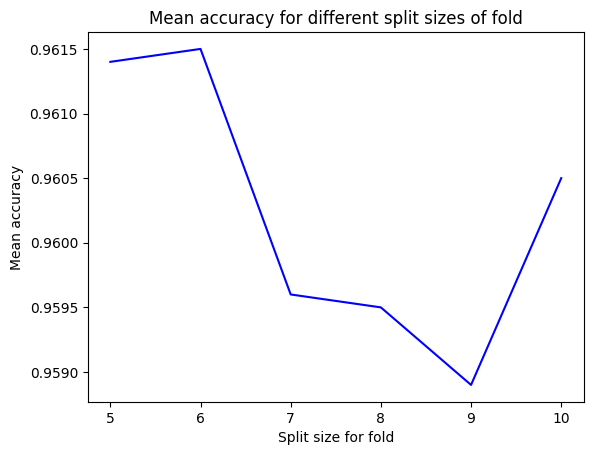

In [ ]:
#from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

np.random.seed(18)

av_accs = []

for j in range(5, 11):
    kfold = StratifiedKFold(n_splits= j, shuffle=True)

    accs = []
    vars = []

    for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]

        model = LogisticRegression().fit(x_train, y_train)
        y_pred = model.predict(x_test)

        acc = round(accuracy_score(y_test, y_pred), 3)
        accs.append(acc)    

    av_acc = round(np.mean(accs), 4)
    var = round(np.var(accs), 4)
    vars.append(var)
    av_accs.append(av_acc)
    
    print(f"Split size for fold = {j} -> MEAN ACCURACY {av_acc}")
    print(f"Split size for fold = {j} -> VAR OF ACCURACY {var}")
    print("--------------------------------------------------")

plt.title("Mean accuracy for different split sizes of fold") 
plt.plot([k for k in range(5, 11)] , av_accs, color='b')
plt.xlabel("Split size for fold") 
plt.ylabel("Mean accuracy") 
plt.show

2.c: Domenski ekspert vam je namignil, da je vrednost ciljne spremenljivke korelirana s kvadratom prve napovedne spremenljivke (X[:, 0]) in produktom prvih treh napovednih sprememnljivk (X[:, 0], X[:, 1], X[:, 2]). Ali lahko namig uporabiš za izboljšanje modela logistične regresije? Če ga lahko, ovrednoti izboljšanje.

Opomba: Opozorilu o problemu s konvergenco se lahko izognete tako, da povečate število iteracij logistične regresije (npr. na 1000).

Split size for fold = 5 -> MEAN ACCURACY 0.9966
Split size for fold = 5 -> VAR OF ACCURACY 1.4e-05
--------------------------------------------------
Split size for fold = 6 -> MEAN ACCURACY 0.995
Split size for fold = 6 -> VAR OF ACCURACY 8e-06
--------------------------------------------------
Split size for fold = 7 -> MEAN ACCURACY 0.99614
Split size for fold = 7 -> VAR OF ACCURACY 5e-06
--------------------------------------------------
Split size for fold = 8 -> MEAN ACCURACY 0.996
Split size for fold = 8 -> VAR OF ACCURACY 2.4e-05
--------------------------------------------------
Split size for fold = 9 -> MEAN ACCURACY 0.99644
Split size for fold = 9 -> VAR OF ACCURACY 1.3e-05
--------------------------------------------------
Split size for fold = 10 -> MEAN ACCURACY 0.996
Split size for fold = 10 -> VAR OF ACCURACY 1.4e-05
--------------------------------------------------


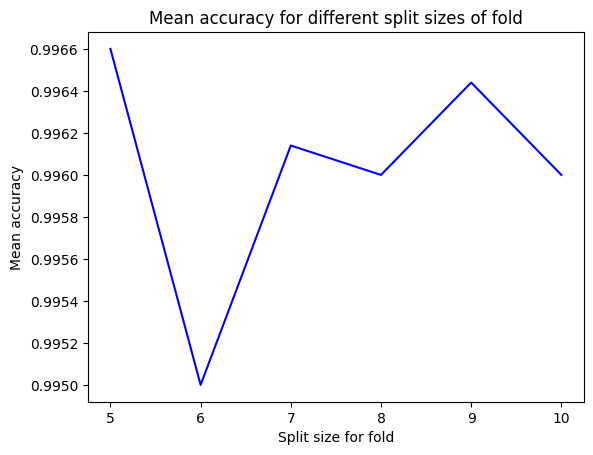

In [ ]:
columns = [x]

x_new_sq = (x[:, 0]**2)[:, None]
x_new_pr = (x[:, 0]* x[:, 1] * x[:, 2])[:, None]
columns.append(x_new_sq)
columns.append(x_new_pr)

x2 = np.concatenate(columns, axis=1)

np.random.seed(18)

av_accs2 = []
vars2 = []

for j in range(5, 11):
    kfold = StratifiedKFold(n_splits=j, shuffle=True)

    accs = []

    for i, (train_index, test_index) in enumerate(kfold.split(x2, y)):
        x_train = x2[train_index, :]
        y_train = y[train_index]
        x_test = x2[test_index, :]
        y_test = y[test_index]

        model = LogisticRegression(max_iter = 10000).fit(x_train, y_train)

        y_pred = model.predict(x_test)

        acc = round(accuracy_score(y_test, y_pred), 3)
        accs.append(acc)   

    av_acc2 = round(np.mean(accs), 5)
    var = round(np.var(accs), 6)
    av_accs2.append(av_acc2)
    vars2.append(var)
    
    print(f"Split size for fold = {j} -> MEAN ACCURACY {av_acc2}")
    print(f"Split size for fold = {j} -> VAR OF ACCURACY {var}")
    print("--------------------------------------------------")

plt.title("Mean accuracy for different split sizes of fold") 
plt.plot([k for k in range(5, 11)], av_accs2, color='b')
plt.xlabel("Split size for fold") 
plt.ylabel("Mean accuracy") 
plt.show


#we need this later
a = av_accs2



Difference of mean accuracies (for split size fold = 5) -> 0.035
Difference of mean accuracies (for split size fold = 6) -> 0.033
Difference of mean accuracies (for split size fold = 7) -> 0.037
Difference of mean accuracies (for split size fold = 8) -> 0.036
Difference of mean accuracies (for split size fold = 9) -> 0.038
Difference of mean accuracies (for split size fold = 10) -> 0.035


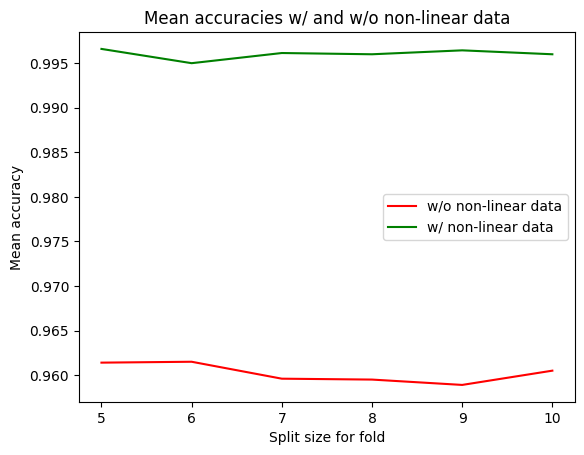

In [ ]:
for i in range(len(av_accs)):
    print(f"Difference of mean accuracies (for split size fold = {i + 5}) -> {round(av_accs2[i] - av_accs[i], 3)}")

plt.title("Mean accuracies w/ and w/o non-linear data") 
plt.plot([k for k in range(5, 11)] , av_accs, color='r', label='w/o non-linear data') 
plt.plot([k for k in range(5, 11)], av_accs2, color='g', label='w/ non-linear data')
plt.xlabel("Split size for fold") 
plt.ylabel("Mean accuracy") 
plt.legend() 
plt.show()

2.d: Ali lahko s pomočjo logistične regresije ugotoviš nabor napovednih spremenljivk, ki za klasifikacijo niso pomembne? Če lahko ugotoviš, potem poročaj katere spremenljivke so v tem naboru, zakaj sodiš, da so v njem, in kakšna je točnost modela logistične regresije, če jih odstraniš iz podatkovne množice? 

Ali se rezultati med prejšnjim in sedanjim modelom zelo razlikujejo? Kaj je po tvoje razlog za to?

In [ ]:
from scipy.stats import norm

np.random.seed(18)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

av_p_values = []
av_coeffs = []

for i, (train_index, test_index) in enumerate(kfold.split(x2, y)):
    x_train = x2[train_index, :]
    y_train = y[train_index]
    x_test = x2[test_index, :]
    y_test = y[test_index]

    model = LogisticRegression(max_iter = 10000).fit(x_train, y_train)

    y_pred = model.predict(x_test)

    coefs = model.coef_
    coefs_list = list(coefs[0])

    std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(x_train.T, x_train))))

    z_scores = coefs / std_err

    p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

    p_values_list = list(p_values[0])

    av_p_values.append(p_values_list)
    av_coeffs.append(coefs_list)

av_c = [round((sum([av_coeffs[j][i] for j in range(len(av_coeffs[0]))]))/(len(av_coeffs)), 4) for i in range(len(av_coeffs))]
av_p = [round((sum([av_p_values[j][i] for j in range(len(av_p_values[0]))]))/(len(av_p_values)), 4) for i in range(len(av_p_values))]

names = [f"X{i}" for i in range(8)] + ["X0^2", "X0*X1*X2"]
print("POVPREČNE VREDNOSTI: (KOEFICIENT, P-VREDNOST)")
print("-----------------------------------------------")
for i in range(len(av_c)):
    print(f"{names[i]} -> {(av_c[i], av_p[i])}")


mask_p = [av_p[i] < 0.05 for i in range(len(av_p))]
mask_c = [abs(av_c[i]) > 0.3 for i in range(len(av_c))]


POVPREČNE VREDNOSTI: (KOEFICIENT, P-VREDNOST)
-----------------------------------------------
X0 -> (0.2052, 0.0)
X1 -> (0.231, 0.0)
X2 -> (-1.1119, 0.0)
X3 -> (0.1072, 0.1017)
X4 -> (3.7471, 0.0)
X5 -> (0.2933, 0.0891)
X6 -> (0.1906, 0.2102)
X7 -> (0.5365, 0.0)
X0^2 -> (0.4784, 0.0)
X0*X1*X2 -> (0.7457, 0.0)


MASK P-VALUES
--------------------------------------------------


Split size for fold = 5 -> MEAN ACCURACY 0.997
Split size for fold = 5 -> VAR OF ACCURACY 1e-05
--------------------------------------------------
Split size for fold = 6 -> MEAN ACCURACY 0.9955
Split size for fold = 6 -> VAR OF ACCURACY 8e-06
--------------------------------------------------
Split size for fold = 7 -> MEAN ACCURACY 0.99614
Split size for fold = 7 -> VAR OF ACCURACY 5e-06
--------------------------------------------------
Split size for fold = 8 -> MEAN ACCURACY 0.9965
Split size for fold = 8 -> VAR OF ACCURACY 2.6e-05
--------------------------------------------------
Split size for fold = 9 -> MEAN ACCURACY 0.99644
Split size for fold = 9 -> VAR OF ACCURACY 1.3e-05
--------------------------------------------------
Split size for fold = 10 -> MEAN ACCURACY 0.996
Split size for fold = 10 -> VAR OF ACCURACY 2.4e-05
--------------------------------------------------
--------------------------------------------------
MASK ABS VALUE OF COEFS
-----------------------------

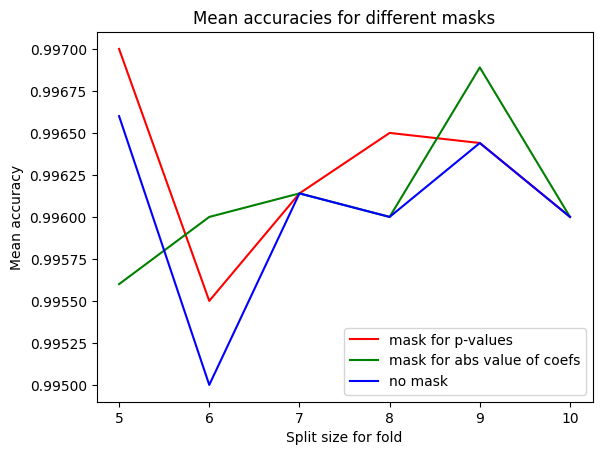

In [ ]:
mask_p = np.array([av_p[i] < 0.05 for i in range(len(av_p))])
mask_c = np.array([abs(av_c[i]) > 0.3 for i in range(len(av_c))])

np.random.seed(18)

def mask_log_reg(mask):

    av_accs2 = []
    vars2 = []

    for j in range(5, 11):
        kfold = StratifiedKFold(n_splits=j, shuffle=True)

        accs = []

        for i, (train_index, test_index) in enumerate(kfold.split(x2, y)):
            x_train = x2[train_index, :] * mask
            y_train = y[train_index] 
            x_test = x2[test_index, :] * mask
            y_test = y[test_index]

            model = LogisticRegression(max_iter = 10000).fit(x_train, y_train)

            y_pred = model.predict(x_test)

            acc = round(accuracy_score(y_test, y_pred), 3)
            accs.append(acc)   

        av_acc2 = round(np.mean(accs), 5)
        var = round(np.var(accs), 6)
        av_accs2.append(av_acc2)
        vars2.append(var)

        print(f"Split size for fold = {j} -> MEAN ACCURACY {av_acc2}")
        print(f"Split size for fold = {j} -> VAR OF ACCURACY {var}")
        print("--------------------------------------------------")
    return av_accs2 

print(f"MASK P-VALUES")
print("--------------------------------------------------")
pl1 = mask_log_reg(mask_p)
print("--------------------------------------------------")
print(f"MASK ABS VALUE OF COEFS")
print("--------------------------------------------------")
pl2 = mask_log_reg(mask_c)

plt.title("Mean accuracies for different masks") 
plt.plot([k for k in range(5, 11)], pl1, color='r', label='mask for p-values') 
plt.plot([k for k in range(5, 11)], pl2, color='g', label='mask for abs value of coefs')
plt.plot([k for k in range(5, 11)] , a, color='b', label='no mask') 
plt.xlabel("Split size for fold") 
plt.ylabel("Mean accuracy") 
plt.legend() 
plt.show()

## Naloga 3: K-najbližjih sosedov

3.a: Preberi podatkovno množico z diskretno ciljno spremenljiko iz datoteke `dn1_3.npz`.  

In [ ]:
data = np.load("dn1_3.npz")
xx = data["x"]
y = data["y"]
x = xx[:, 1:]
z = np.concatenate((x, y[:, None]), axis=1)

3.b: Sestavi napovedni model k-najbližjih sosedov s čim nižjim RMSE-jem. Poskrbi, da poleg ocene točnosti modela, poročaš tudi stabilnost ocene. Opiši, kakšen je tvoj model in kako/zakaj si se odločil za vsako izbiro. Opiši tudi eksperimente, ki si jih poskusil/a, a niso izboljšali rezultata.

Opomba: Pomen spremenljivk je sledeč:
- $x_1$: Zaporedna številka diamanta v bazi
- $x_2$: Število karatov
- $x_3$: Procent globine diamanta ($\frac{2\cdot z}{x+y}$)
- $x_4$: Razmerje med širino vrha in najširšo točko
- $x_5$: Dolžina diamanta
- $x_6$: Širina diamanta
- $x_7$: Globina diamanta
- $x_8$: Kvaliteta brusa ("Ideal": 4, "Premium": 3, "Very Good": 2, "Good": 1, "Fair": 0)
- $x_{9}$: Barva ("D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J":6)
- $x_{10}$: Čistost ("I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7)
- $x_{11}$: Oddaljenost najdišča od ekvatorja
- $y$: Cena diamanta


In [ ]:
import pandas as pd
df = pd.DataFrame(z, columns=['carat', 'depth %', 'ratio width', 'length', 'width', 'depth', 'cut_cat', 'color_cat', 'clarity_cat', 'from_ecuator', 'price'])
print(df)

       carat  depth %  ratio width  length  width  depth  cut_cat  color_cat  \
0       0.23     61.5         55.0    3.95   3.98   2.43      4.0        1.0   
1       0.21     59.8         61.0    3.89   3.84   2.31      3.0        1.0   
2       0.23     56.9         65.0    4.05   4.07   2.31      1.0        1.0   
3       0.29     62.4         58.0    4.20   4.23   2.63      3.0        5.0   
4       0.31     63.3         58.0    4.34   4.35   2.75      1.0        6.0   
...      ...      ...          ...     ...    ...    ...      ...        ...   
53935   0.72     60.8         57.0    5.75   5.76   3.50      4.0        0.0   
53936   0.72     63.1         55.0    5.69   5.75   3.61      1.0        0.0   
53937   0.70     62.8         60.0    5.66   5.68   3.56      2.0        0.0   
53938   0.86     61.0         58.0    6.15   6.12   3.74      3.0        4.0   
53939   0.75     62.2         55.0    5.83   5.87   3.64      4.0        0.0   

       clarity_cat  from_ecuator   pric

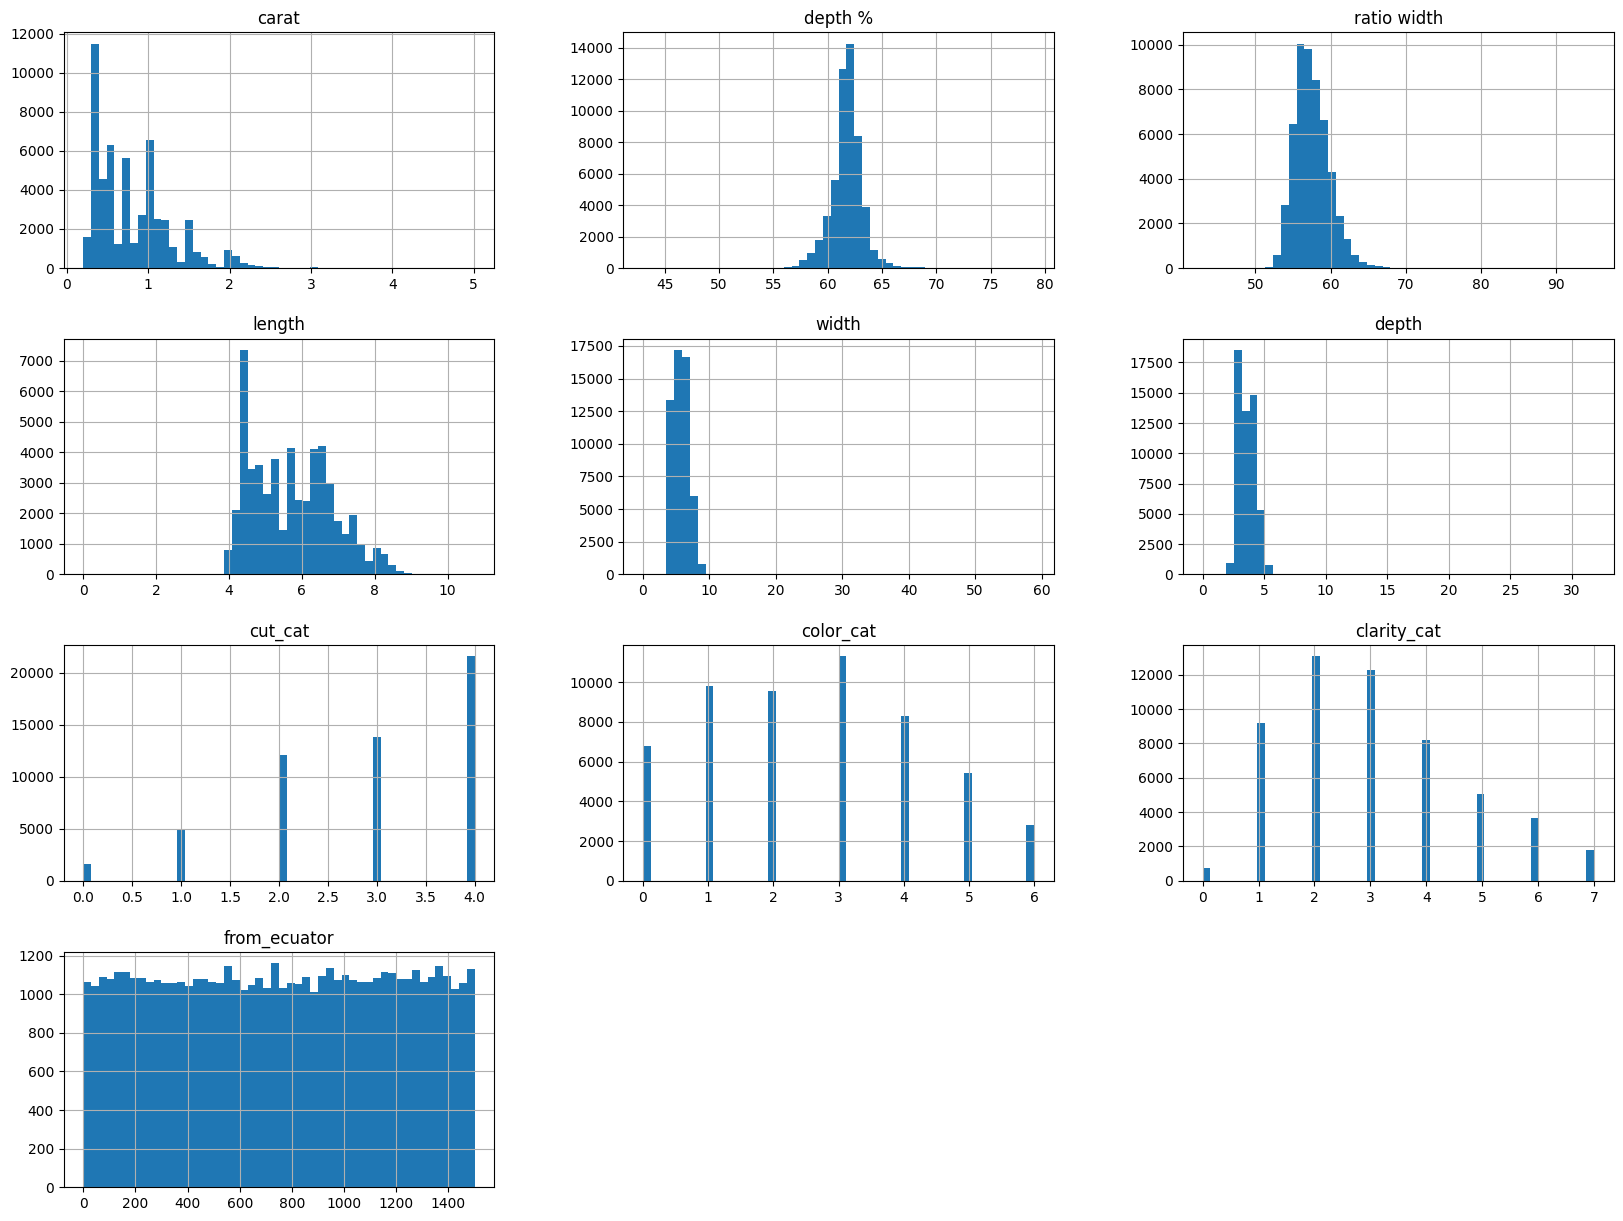

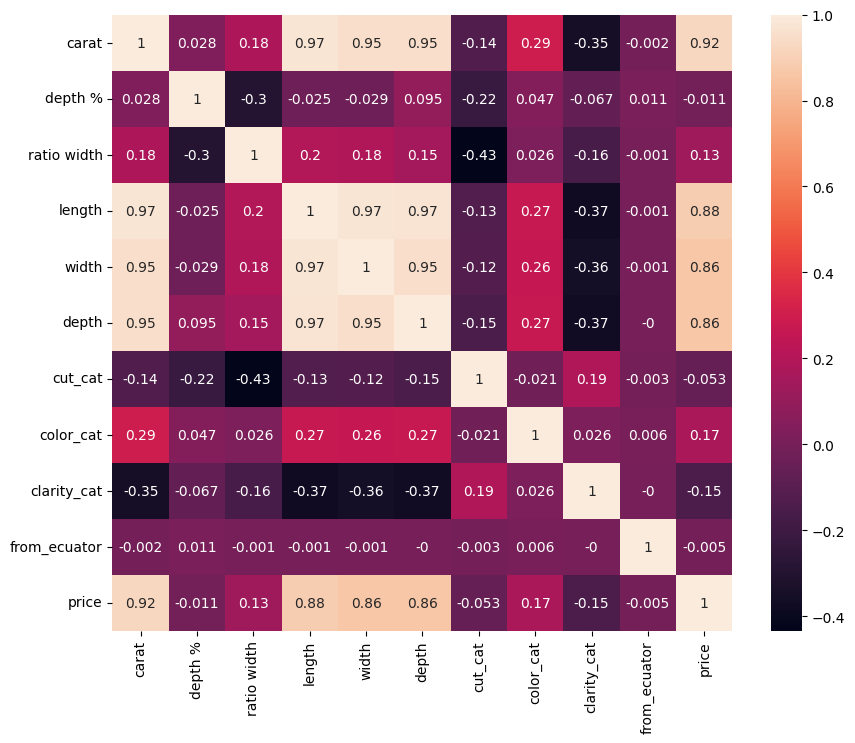

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df.head()
(df.drop(["price"], axis = 1)).hist(bins = 50, figsize = (20, 15))
plt.show()

df_wo_price = df.drop(["price"], axis = 1)


scalar = StandardScaler() 

scaled_data = scalar.fit_transform(df_wo_price)
scaled_data_pd = pd.DataFrame(scaled_data, columns=['carat', 'depth %', 'ratio width', 'length', 'width', 'depth', 'cut_cat', 'color_cat', 'clarity_cat', 'from_ecuator'])
scaled_data_np = pd.DataFrame.to_numpy(scaled_data_pd)
scaled_w_price = scaled_data_pd.join(pd.DataFrame(y, columns = ['price']))
corr_scaled_data_w_price = np.round(scaled_w_price.corr(), 3)
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_scaled_data_w_price, annot = True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

def mean_error_mask(scaled_data_np, y, ind_mask):

    np.random.seed(18)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)

    mean_errors = []
    vars = []

    mask = [False if i != ind_mask else True for i in range(np.shape((scaled_data_np))[1])]
    
    print(f"COLUMN: {ind_mask} = {list(scaled_data_pd)[ind_mask]}")
    print("------------------------")

    for k in range(5, 6):

        errors = []

        for i, (train_index, test_index) in enumerate(kfold.split(scaled_data_np, y)):

            x_train = scaled_data_np[train_index, :]
            y_train = y[train_index]
            x_test = scaled_data_np[test_index, :]
            y_test = y[test_index]

            x_train = x_train * mask
            x_test = x_test * mask

            model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
            y_pred = (model.predict(x_test))

            error = np.sqrt(mean_squared_error(y_test, y_pred))
            errors.append(error)


        mean_error = np.mean(errors)
        mean_errors.append(mean_error)
        var = np.var(errors)
        vars.append(var)

        print(f"k = {k} ->  MEAN ERROR: {round(mean_error, 2)}, VARIANCE OF ERROR: {round(var, 2)}")
        print("-------------------------------------------------------------")
    return round(min(mean_errors), 3)

lst_errors_mask = []
for i in range(np.shape(scaled_data_np)[1]):
    mask_err = mean_error_mask(scaled_data_np, y, i)
    lst_errors_mask.append(mask_err)
print(lst_errors_mask)

COLUMN: 0 = carat
--------------------
k = 5 ->  MEAN ERROR: 2754.0, VARIANCE OF ERROR: 910.92
----------------------------------------------------------
COLUMN: 1 = depth %
--------------------
k = 5 ->  MEAN ERROR: 4381.51, VARIANCE OF ERROR: 233.34
----------------------------------------------------------
COLUMN: 2 = ratio width
--------------------
k = 5 ->  MEAN ERROR: 5122.46, VARIANCE OF ERROR: 10521.46
----------------------------------------------------------
COLUMN: 3 = length
--------------------
k = 5 ->  MEAN ERROR: 2331.27, VARIANCE OF ERROR: 1046.34
----------------------------------------------------------
COLUMN: 4 = width
--------------------
k = 5 ->  MEAN ERROR: 2282.02, VARIANCE OF ERROR: 828.64
----------------------------------------------------------
COLUMN: 5 = depth
--------------------
k = 5 ->  MEAN ERROR: 2585.75, VARIANCE OF ERROR: 1970.34
----------------------------------------------------------
COLUMN: 6 = cut_cat
--------------------
k = 5 ->  MEAN ER

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import random as rd

SCALE_0 = np.array([round(1 - (lst_errors_mask[i]/10000), 3) for i in range(len(lst_errors_mask))])
BEST_SCALE = np.array([ 0.9785, -0.005  ,-0.0015 , 0.07  ,  0.1775, -0.03825 , 0.095   ,0.306 ,  0.895, 0.    ])


def min_mean_error(scaled_data_np, y, scale):

    np.random.seed(18)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)

    mean_errors = []

    for k in range(5, 16):

        errors = []

        for i, (train_index, test_index) in enumerate(kfold.split(scaled_data_np, y)):

            x_train = scaled_data_np[train_index, :]
            y_train = y[train_index]
            x_test = scaled_data_np[test_index, :]
            y_test = y[test_index]

            x_train = x_train * scale
            x_test = x_test * scale

            model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
            y_pred = (model.predict(x_test))

            error = np.sqrt(mean_squared_error(y_test, y_pred))
            errors.append(error)


        mean_error = np.mean(errors)
        var = np.var(errors)
        mean_errors.append(mean_error)
        print(f"k = {k} ->  MEAN ERROR: {round(mean_error, 3)}")
        print(f"k = {k} ->  VARIANCE: {round(var, 3)}")
        print("----------------------------------------------")

    print("---------------------------------------------------------------")
    print(f"lowest RMSE if k = {mean_errors.index(min(mean_errors)) + 3}, it's value: {round(min(mean_errors), 3)}")
    print("---------------------------------------------------------------")

    return round(min(mean_errors), 3)

def find_best_scale(f_scale, n = 5):

    min_scale = f_scale
    min_err = min_mean_error(scaled_data_np, y, f_scale)

    while n > 0:
        n = n - 1

        rand = rd.randint(0,9)
        sign = rd.randint(0,1)
        sgn = 1 if sign == 1 else -1

        move = np.array([0 if i != rand else sgn * 0.001 for i in range(10)])
        new_scale = min_scale + move

        err = min_mean_error(scaled_data_np, y, new_scale)

        if err < min_err:
            min_err = err
            min_scale = new_scale
            print(f"new_scale = {new_scale}, new min error = {min_err}")
        else:
            continue
    return min_scale, min_err

print(f"SCALE_0")
print("---------------------------------------------------------------------------------------------")
min_mean_error(scaled_data_np, y, SCALE_0)

print(f"BEST_SCALE")
print("---------------------------------------------------------------------------------------------")
min_mean_error(scaled_data_np, y, BEST_SCALE)

#s, e = find_best_scale(SCALE, 30)
#print("==================================================")
#print(s)
#print(e)



SCALE_0
---------------------------------------------------------------------------------------------
k = 5 ->  MEAN ERROR: 764.546
k = 5 ->  VARIANCE: 299.782
----------------------------------------------
k = 6 ->  MEAN ERROR: 758.871
k = 6 ->  VARIANCE: 211.541
----------------------------------------------
k = 7 ->  MEAN ERROR: 757.721
k = 7 ->  VARIANCE: 285.681
----------------------------------------------
k = 8 ->  MEAN ERROR: 754.085
k = 8 ->  VARIANCE: 62.702
----------------------------------------------
k = 9 ->  MEAN ERROR: 753.894
k = 9 ->  VARIANCE: 234.554
----------------------------------------------
k = 10 ->  MEAN ERROR: 752.793
k = 10 ->  VARIANCE: 219.682
----------------------------------------------
k = 11 ->  MEAN ERROR: 754.667
k = 11 ->  VARIANCE: 126.023
----------------------------------------------
k = 12 ->  MEAN ERROR: 756.406
k = 12 ->  VARIANCE: 137.376
----------------------------------------------
k = 13 ->  MEAN ERROR: 754.675
k = 13 ->  VARIANCE: 2

561.57

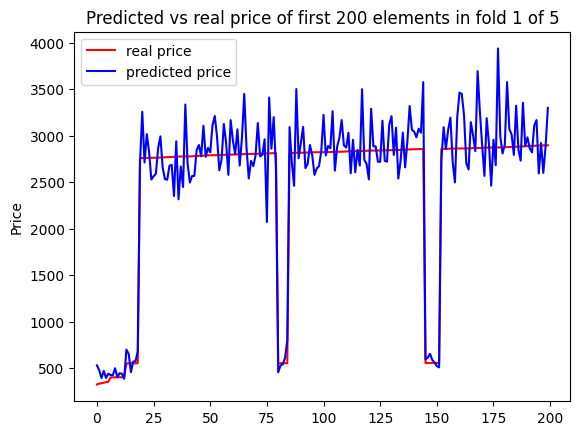

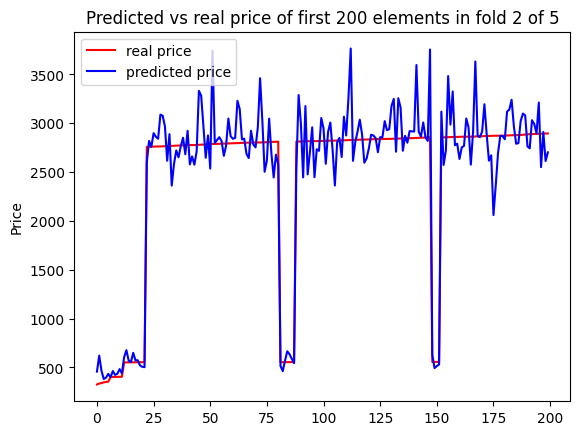

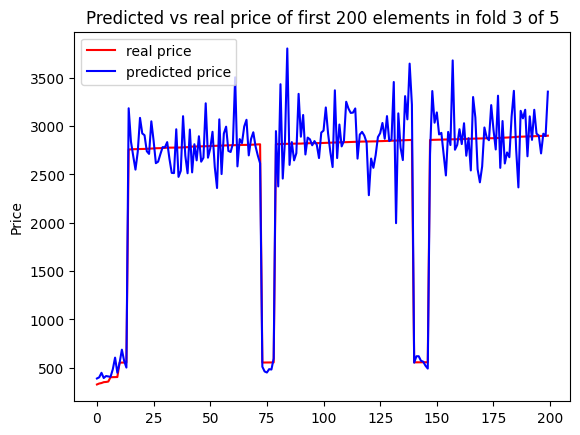

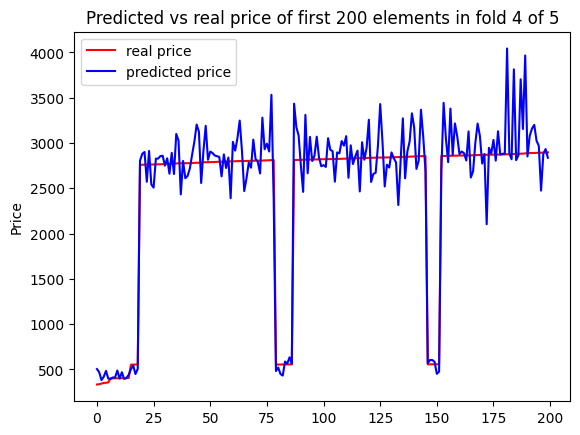

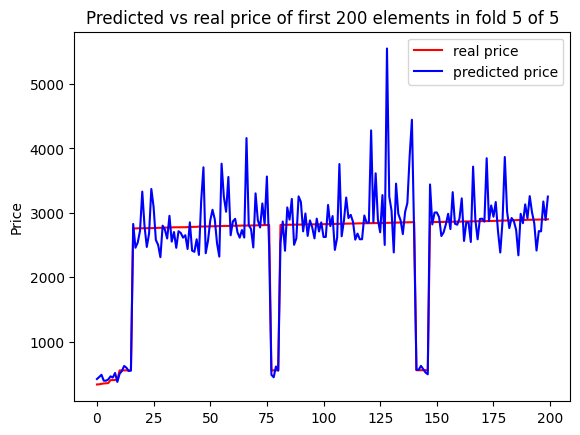

In [ ]:
np.random.seed(18)
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(kfold.split(scaled_data_np, y)):
    x_train = scaled_data_np[train_index, :]
    y_train = y[train_index]
    x_test = scaled_data_np[test_index, :]
    y_test = y[test_index]
    x_train = x_train * BEST_SCALE
    x_test = x_test * BEST_SCALE
    
    model = KNeighborsRegressor(n_neighbors = 10).fit(x_train, y_train)
    y_pred = (model.predict(x_test))

    plt.title(f"Predicted vs real price of first 200 elements in fold {i+1} of 5") 
    plt.plot([k for k in range(200)] , y_test[:200], color='r', label='real price') 
    plt.plot([k for k in range(200)], y_pred[:200], color='b', label='predicted price')
    plt.ylabel("Price") 
    plt.legend() 
    plt.show()